# Importando Bibliotecas

In [105]:
#pip install yellowbrick

In [106]:
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes

## Base Risco de Crédito

In [107]:
data_risco_cedito = pd.read_csv('risco_credito.csv')

In [108]:
data_risco_cedito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [109]:
x_risco_credito = data_risco_cedito.iloc[:, 0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [110]:
y_risco_credito = data_risco_cedito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

from sklearn.preprocessing import LabelEncoder

In [111]:
label_enconder_historia	= LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantias = LabelEncoder()
label_enconder_renda = LabelEncoder()	


In [112]:
x_risco_credito[:, 0] = label_enconder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_enconder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_enconder_garantias.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_enconder_renda.fit_transform(x_risco_credito[:, 3])

In [113]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

import pickle

In [114]:
with open ('risco_credito.plk', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito], f)

from sklearn.naive_bayes import GaussianNB

In [115]:
naive_risco_crdito = GaussianNB()
naive_risco_crdito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

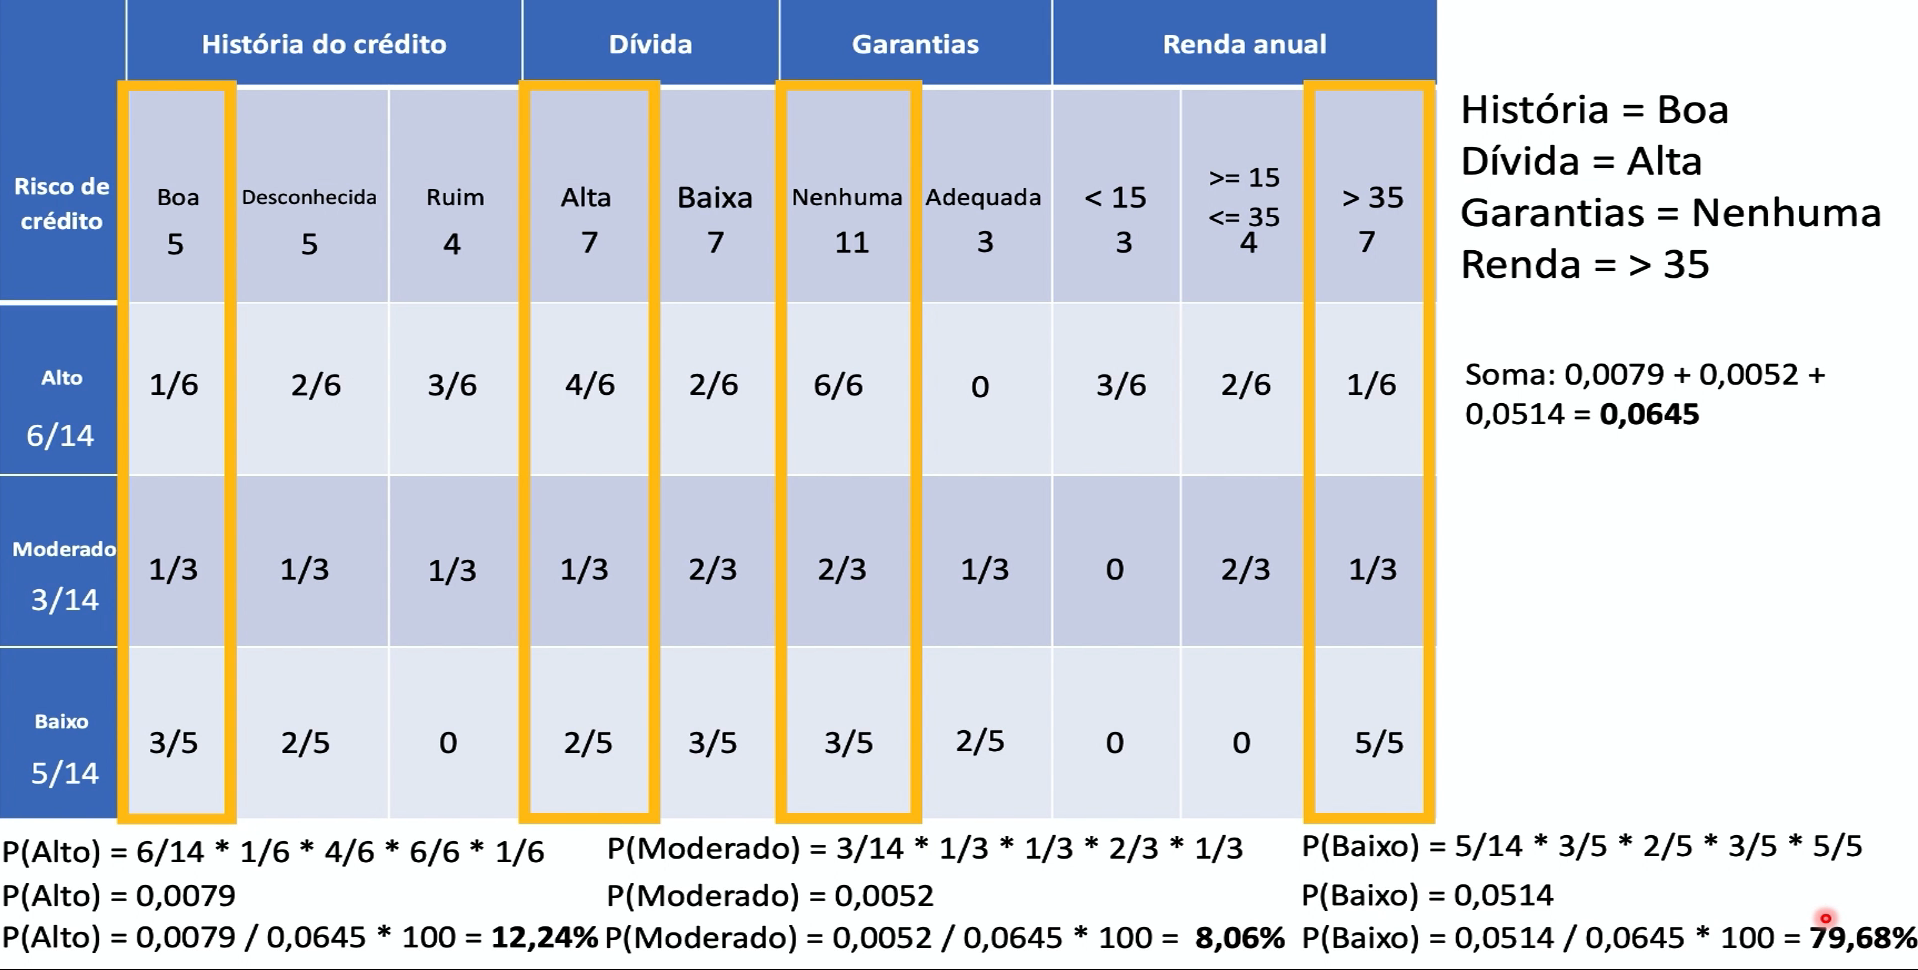

história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)

história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

In [116]:
previsao = naive_risco_crdito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [117]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [118]:
naive_risco_crdito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [119]:
naive_risco_crdito.class_count_

array([6., 5., 3.])

In [120]:
naive_risco_crdito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base Credit Data

In [121]:
with open('credit.plk', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [122]:
x_credit_training.shape, y_credit_training.shape

((1500, 3), (1500,))

In [123]:
x_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [124]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_training, y_credit_training)

GaussianNB()

In [125]:
previsoes = naive_credit_data.predict(x_credit_test)

In [126]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [127]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

from sklearn.metrics import accurancy_score, confusion_matrix

In [128]:
accuracy_score(y_credit_test, previsoes)

0.938

In [129]:
confusion_matrix(y_credit_test, previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

from yellowbrick.classifier import ConfusionMatrix

0.938

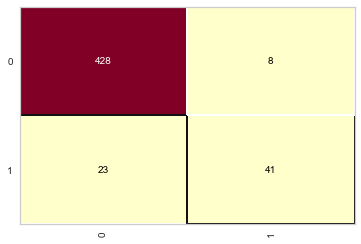

In [130]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_training, y_credit_training)
cm.score(x_credit_test, y_credit_test)

from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base Census 

In [132]:
with open('census.plk', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [133]:
x_census_training.shape, y_census_training.shape

((27676, 108), (27676,))

In [134]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [135]:
naive_census_data = GaussianNB()

In [136]:
naive_census_data.fit(x_census_training, y_census_training)

GaussianNB()

In [137]:
previsoes = naive_census_data.predict(x_census_test)

In [139]:
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [140]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [141]:
accuracy_score(y_census_test, previsoes)

0.4767656090071648

0.4767656090071648

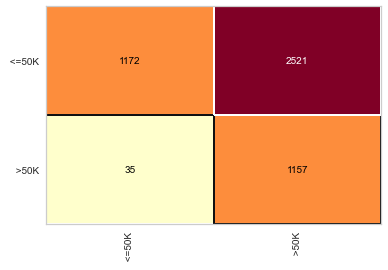

In [142]:
cm = ConfusionMatrix(naive_census_data)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [144]:
print(classification_report(y_census_test,previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

